# Plots

In [1]:
import json, re, collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytube import YouTube

## Full model for 10 videos, both clipping techniques

In [44]:
# Captions: no clipping
captions_full = pd.read_json('/home/A01630791/bmt_clipping_experiments/captions_MABC_fullvideos.json')
captions_full['number_captions'] = [len(sample.captions) for index, sample in captions_full.iterrows()]
captions_full.sort_values(by="video_id",  inplace=True)
captions_full

,captions,duration,video_id,number_captions
5,"[{'start': 0.8, 'end': 40.5, 'sentence': 'A pe...",345,0kRtLFXIKpM,11
4,"[{'start': 3.9, 'end': 54.8, 'sentence': 'A wo...",494,69cpDT0rJNM,5
7,"[{'start': 0.0, 'end': 249.6, 'sentence': 'A m...",395,A_aFIpDqRPw,7
0,"[{'start': 0.0, 'end': 66.0, 'sentence': 'A ma...",253,HzSkdZzqvT8,6
9,"[{'start': 6.5, 'end': 38.4, 'sentence': 'A wo...",312,KI8WzyzQbGE,9
8,"[{'start': 0.0, 'end': 91.3, 'sentence': 'A gi...",481,aZPAKeZe_Vc,7
3,"[{'start': 0.0, 'end': 229.5, 'sentence': 'A m...",300,alF-r5DlERY,3
6,"[{'start': 5.7, 'end': 53.3, 'sentence': 'A ma...",505,e4nrthWzflw,5
1,"[{'start': 28.8, 'end': 198.3, 'sentence': 'A ...",361,qy6dlGpC3Ns,6
2,"[{'start': 27.1, 'end': 199.4, 'sentence': 'A ...",487,v4hRS2XF5WA,5


In [43]:
# Captions: fixed-time clipping (120s)
captions_ft120 = pd.read_json('/home/A01630791/bmt_clipping_experiments/Output_4_5/4_5_filtered_captions_ft.json')
captions_ft120['number_captions_ft120'] = [len(sample.captions) for index, sample in captions_ft120.iterrows()]
captions_ft120.sort_values(by="video_id",  inplace=True)
captions_ft120

,captions,duration,video_id,number_captions_ft120
3,"[{'start': 147.554, 'end': 185.554, 'sentence'...",351.395,0kRtLFXIKpM,5
8,"[{'start': 124.256, 'end': 149.656, 'sentence'...",262.354,69cpDT0rJNM,3
5,"[{'start': 120.054, 'end': 242.654, 'sentence'...",404.271,A_aFIpDqRPw,5
0,"[{'start': 120.034, 'end': 131.434, 'sentence'...",242.752,HzSkdZzqvT8,3
2,"[{'start': 240.976, 'end': 242.076, 'sentence'...",312.844,KI8WzyzQbGE,6
6,"[{'start': 253.45600000000002, 'end': 295.356,...",365.815,aZPAKeZe_Vc,5
1,"[{'start': 127.54, 'end': 173.34, 'sentence': ...",302.759,alF-r5DlERY,6
9,"[{'start': 366.60499999999996, 'end': 374.8049...",512.847,e4nrthWzflw,12
4,"[{'start': 208.34, 'end': 239.14, 'sentence': ...",249.422,qy6dlGpC3Ns,2
7,"[{'start': 435.1, 'end': 485.5, 'sentence': 'A...",492.833,v4hRS2XF5WA,8


In [49]:
# Captions: pyscene clipping
captions_ps = pd.read_json('/home/A01630791/bmt_clipping_experiments/Output_4_5/4_5_filtered_captions_ps.json')
captions_ps['number_captions_ps'] = [len(sample.captions) for index, sample in captions_ps.iterrows()]
captions_ps.sort_values(by="video_id",  inplace=True)
captions_ps.groupby(by="video_id").number_captions_ps.sum()

video_id
0kRtLFXIKpM    46
69cpDT0rJNM    39
A_aFIpDqRPw    55
HzSkdZzqvT8    39
KI8WzyzQbGE    15
aZPAKeZe_Vc    76
alF-r5DlERY    52
e4nrthWzflw    90
qy6dlGpC3Ns    12
v4hRS2XF5WA    31
Name: number_captions_ps, dtype: int64

In [50]:
captions_10_videos = pd.merge(captions_full, captions_ft120[["video_id", "number_captions_ft120"]], how="left", left_on="video_id", right_on="video_id")
captions_10_videos = pd.merge(captions_10_videos, captions_ps[["video_id", "number_captions_ps"]], how="left", left_on="video_id", right_on="video_id")
captions_10_videos

,captions,duration,video_id,number_captions,number_captions_ft120,number_captions_ps
0,"[{'start': 0.8, 'end': 40.5, 'sentence': 'A pe...",345,0kRtLFXIKpM,11,5,46
1,"[{'start': 3.9, 'end': 54.8, 'sentence': 'A wo...",494,69cpDT0rJNM,5,3,39
2,"[{'start': 0.0, 'end': 249.6, 'sentence': 'A m...",395,A_aFIpDqRPw,7,5,55
3,"[{'start': 0.0, 'end': 66.0, 'sentence': 'A ma...",253,HzSkdZzqvT8,6,3,39
4,"[{'start': 6.5, 'end': 38.4, 'sentence': 'A wo...",312,KI8WzyzQbGE,9,6,15
5,"[{'start': 0.0, 'end': 91.3, 'sentence': 'A gi...",481,aZPAKeZe_Vc,7,5,76
6,"[{'start': 0.0, 'end': 229.5, 'sentence': 'A m...",300,alF-r5DlERY,3,6,52
7,"[{'start': 5.7, 'end': 53.3, 'sentence': 'A ma...",505,e4nrthWzflw,5,12,90
8,"[{'start': 28.8, 'end': 198.3, 'sentence': 'A ...",361,qy6dlGpC3Ns,6,2,12
9,"[{'start': 27.1, 'end': 199.4, 'sentence': 'A ...",487,v4hRS2XF5WA,5,8,31


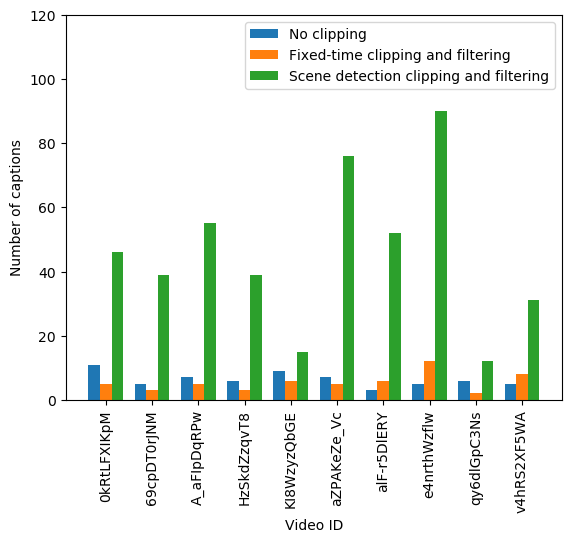

In [68]:
# Plot
n = len(captions_full.index)
x = np.arange(n)
width = 0.25

f = plt.figure()
f.set_figheight(5)

plt.bar(x - width, captions_10_videos.number_captions, width=width, label=captions_10_videos.video_id)
plt.bar(x, captions_10_videos.number_captions_ft120, width=width)
plt.bar(x + width, captions_10_videos.number_captions_ps, width=width)

plt.xlabel("Video ID")
plt.ylabel("Number of captions")

plt.legend(["No clipping", "Fixed-time clipping and filtering", "Scene detection clipping and filtering"])

plt.ylim(0, 120)

plt.xticks(x, captions_10_videos.video_id, rotation=90)
plt.savefig('/home/A01630791/bmt_clipping_experiments/Output_4_5/10videos.png', dpi=300, bbox_inches='tight')
plt.show()